<a href="https://colab.research.google.com/github/Rockingmadhav/Customer-Segmentation-Analysis-Using-K-means-Clustering/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=42, cluster_std=1.0)

In [6]:
df = pd.DataFrame(X, columns=['Recency', 'Frequency'])

In [7]:
print(df.head())

    Recency  Frequency
0 -8.555040   7.064618
1 -6.137532  -6.580817
2 -6.321300  -6.804104
3  4.180518   1.123325
4  4.380287   0.470027


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [9]:
inertia = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method')

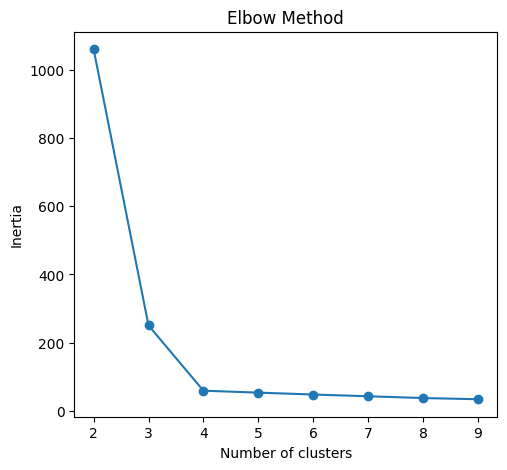

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')


Text(0.5, 1.0, 'Silhouette Score Method')

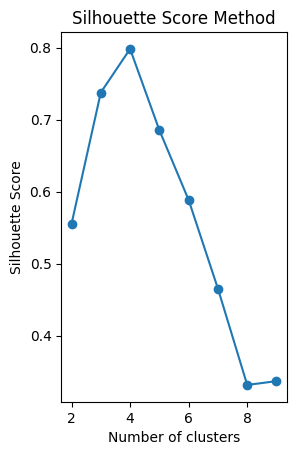

In [11]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

In [12]:

plt.tight_layout()
plt.show()
k = 4

<Figure size 640x480 with 0 Axes>

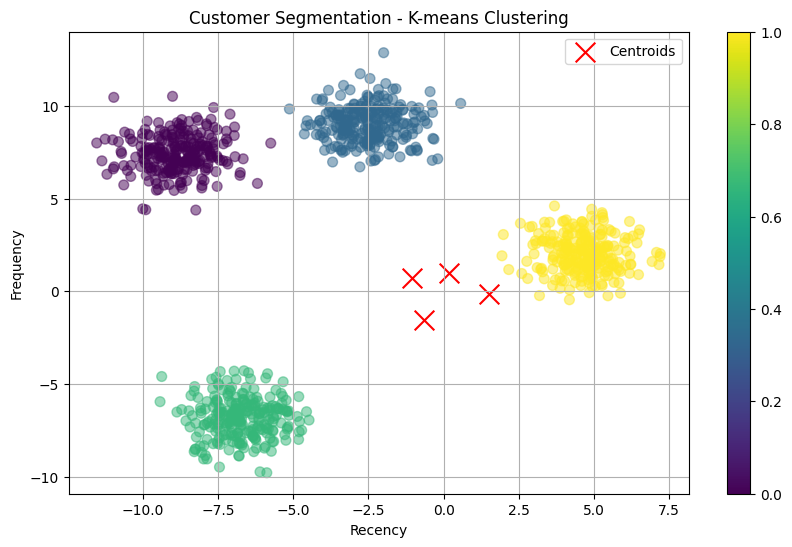

In [14]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Recency'], df['Frequency'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation - K-means Clustering')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()